In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [2]:
data = pd.read_excel('Python_test.xlsx',sheet_name='Question 2 Data - cars')
data.head()

,CarModel,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
data.shape

(32, 12)

In [4]:
data.isna().sum()

CarModel    0
mpg         0
cyl         0
disp        0
hp          0
drat        0
wt          0
qsec        0
vs          0
am          0
gear        0
carb        0
dtype: int64

In [5]:
data.dtypes

CarModel     object
mpg         float64
cyl           int64
disp        float64
hp            int64
drat        float64
wt          float64
qsec        float64
vs            int64
am            int64
gear          int64
carb          int64
dtype: object

# Exploratory Data Analysis

In [6]:
data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


Let's look at mpg

In [7]:
data.mpg.describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

So the minimum value is 10.4 and maximum is 33.9, but on average it is 20.09 with a variation of 6.02

In [8]:
sns.distplot(data['mpg'])

In [9]:
print("Skewness: %f" % data['mpg'].skew())
print("Kurtosis: %f" % data['mpg'].kurt())

Skewness: 0.672377
Kurtosis: -0.022006


The data is very much Normally Distributed

### Normalization:

In [10]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [11]:
data_scale = data.copy()

In [12]:
data_scale.columns

Index(['CarModel', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [13]:
data_scale ['mpg'] = scale(data_scale['mpg'])
data_scale ['disp'] = scale(data_scale['disp'])
data_scale ['hp'] = scale(data_scale['hp'])
data_scale['drat'] = scale(data_scale['drat'])
data_scale ['wt'] = scale(data_scale['mpg'])
data_scale['qsec'] = scale(data_scale['cyl'])


In [14]:
data_scale.head()

,CarModel,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,0.451064,6,0.221751,0.204947,0.525346,0.451064,0.5,0,1,4,4
1,Mazda RX4 Wag,0.451064,6,0.221751,0.204947,0.525346,0.451064,0.5,0,1,4,4
2,Datsun 710,0.527660,4,0.092043,0.144876,0.502304,0.527660,0.0,1,1,4,1
3,Hornet 4 Drive,0.468085,6,0.466201,0.204947,0.147465,0.468085,0.5,1,0,3,1
4,Hornet Sportabout,0.353191,8,0.720629,0.434629,0.179724,0.353191,1.0,0,0,3,2


All our continuous data is now scaled to the same range of [0,1]. This will help us visualize data better. We used a copy of the original data-set for this as we will use the data-set later when we build regression models.

### Lets look at MPG's relation to categories

MPG distribution for am

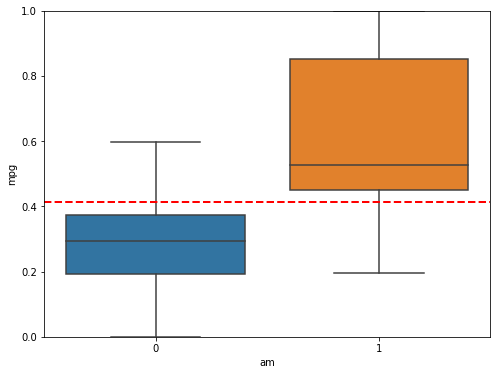

In [15]:
var = 'am'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

The red line marks the average of the set. From the above plot we can observe:
Majority of the manual (am = 1) cars have MPG above global average.
Majority of the automatic (am = 0) cars have MPG below below average.

# Question 1 “Is an automatic or manual transmission better for MPG”

## Answer 1 As per the above plot Manual transmission is better for MPG

MPG distribution for cyl

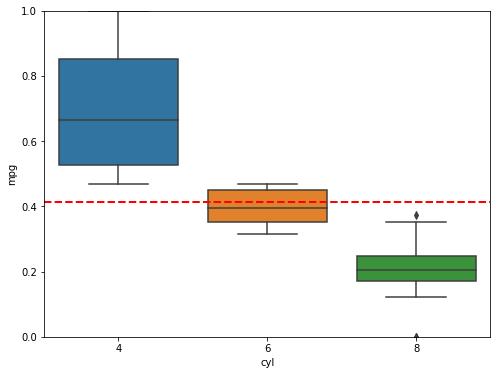

In [16]:
var = 'cyl'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

Majority of the cars which has 4 cylinders have MPG above global average.
Majority of the cars which has 6 or 8 cylinders have MPG below global average.

MPG distribution for vs

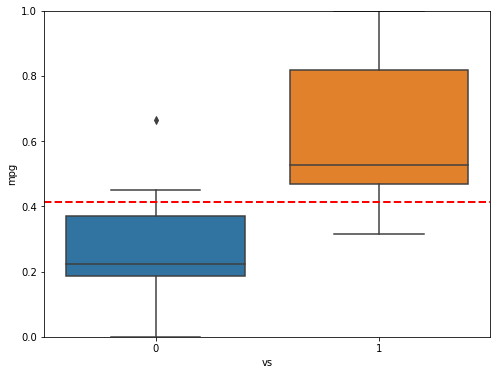

In [17]:
var = 'vs'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

MPG distribution for gear

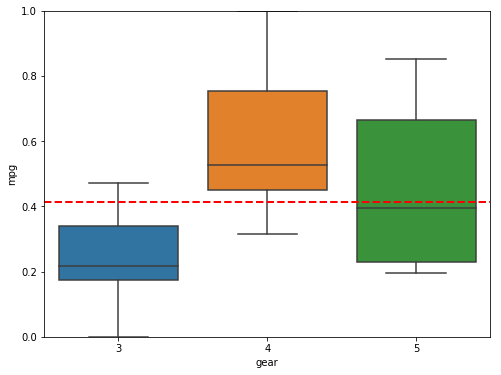

In [18]:
var = 'gear'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

MPG distribution for carb

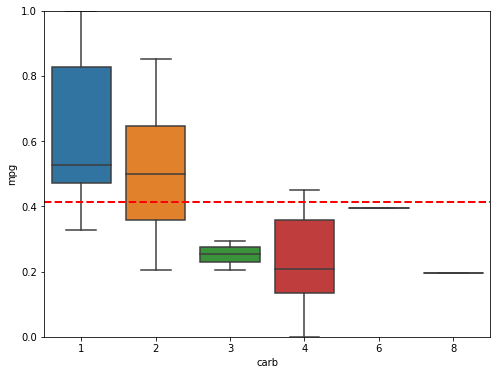

In [19]:
var = 'carb'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

# Lets look at some extremes

In [20]:
var='mpg'
data[data[var]== data[var].min()]

,CarModel,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4


In [21]:
data[data[var]== data[var].max()]

,CarModel,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.9,1,1,4,1


In [22]:
var='disp'
data[data[var]== data[var].min()]

,CarModel,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.9,1,1,4,1


In [23]:
data[data[var]== data[var].max()]

,CarModel,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.25,17.98,0,0,3,4


In [24]:
var='hp'
data[data[var]== data[var].min()]

,CarModel,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2


In [25]:
data[data[var]== data[var].max()]

,CarModel,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


In [26]:
var='wt'
data[data[var]== data[var].min()]

,CarModel,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2


In [27]:
data[data[var]== data[var].max()]

,CarModel,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
15,Lincoln Continental,10.4,8,460.0,215,3.0,5.424,17.82,0,0,3,4


In [28]:
var='qsec'
data[data[var]== data[var].min()]

,CarModel,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.17,14.5,0,1,5,4


In [29]:
data[data[var]== data[var].max()]

,CarModel,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
8,Merc 230,22.8,4,140.8,95,3.92,3.15,22.9,1,0,4,2


# Now let's try to find some logical causation for variations in mpg.

### This will help us in understanding the trends in these relations. We will split the regressions for different am.

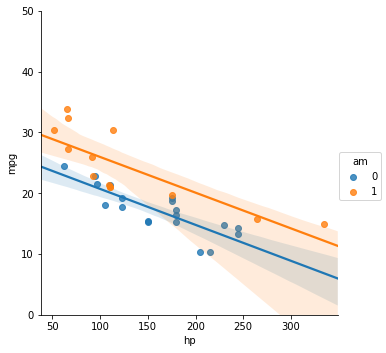

In [30]:
var = 'hp'
plot = sns.lmplot(var,'mpg',data=data,hue='am')
plot.set(ylim = (0,50))

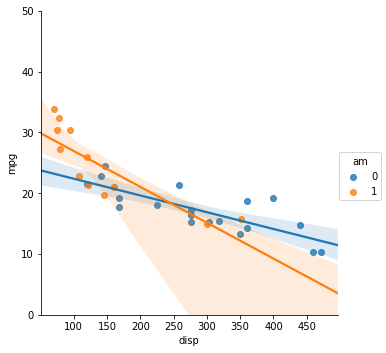

In [31]:
var = 'disp'
plot = sns.lmplot(var,'mpg',data=data,hue='am')
plot.set(ylim = (0,50))

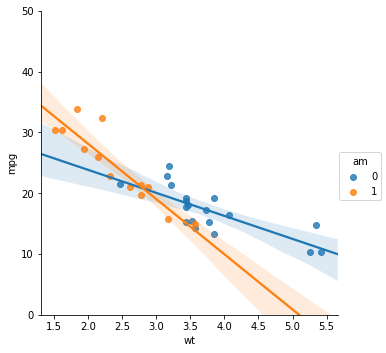

In [32]:
var = 'wt'
plot = sns.lmplot(var,'mpg',data=data,hue='am')
plot.set(ylim = (0,50))

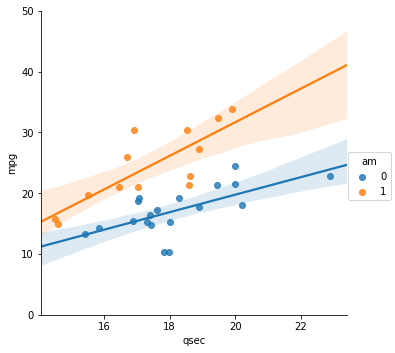

In [33]:
var = 'qsec'
plot = sns.lmplot(var,'mpg',data=data,hue='am')
plot.set(ylim = (0,50))

# Regression Modelling

In [34]:
data.head()

,CarModel,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [36]:
data.columns

Index(['CarModel', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [37]:
factors = ['cyl','disp','hp','drat','qsec','wt','vs','am','gear','carb']
X = pd.DataFrame(data[factors].copy())
y = data['mpg'].copy()

In [38]:
X = StandardScaler().fit_transform(X)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0] == y_train.shape[0]

True

In [40]:
regressor = LinearRegression()

In [41]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
y_predicted = regressor.predict(X_test)

In [43]:
print("RMSE for Test: {}".format(np.sqrt(mean_squared_error(regressor.predict(X_test),y_test))))

RMSE for Test: 3.9384486738677134


## Important features

In [44]:
from scipy import stats

In [45]:
data.head()

,CarModel,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [46]:
pearson_coef, p_value = stats.pearsonr(data['disp'], data['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.8475513792624787  with a P-value of P = 9.38032653738138e-10


In [47]:
pearson_coef, p_value = stats.pearsonr(data['hp'], data['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.7761683718265864  with a P-value of P = 1.7878352541210664e-07


In [48]:
pearson_coef, p_value = stats.pearsonr(data['drat'], data['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.6811719078067493  with a P-value of P = 1.776239928752415e-05


In [49]:
pearson_coef, p_value = stats.pearsonr(data['wt'], data['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.8676593765172279  with a P-value of P = 1.2939587013504953e-10


In [50]:
pearson_coef, p_value = stats.pearsonr(data['qsec'], data['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.4186840339217782  with a P-value of P = 0.017081988496519575


In [51]:
pearson_coef, p_value = stats.pearsonr(data['am'], data['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5998324294546479  with a P-value of P = 0.0002850207439350673


In [52]:
pearson_coef, p_value = stats.pearsonr(data['cyl'], data['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.8521619594266132  with a P-value of P = 6.112687142580982e-10


In [53]:
pearson_coef, p_value = stats.pearsonr(data['vs'], data['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.6640389191275928  with a P-value of P = 3.41593725441996e-05


In [54]:
pearson_coef, p_value = stats.pearsonr(data['gear'], data['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.4802847573388421  with a P-value of P = 0.0054009482247076345


In [55]:
pearson_coef, p_value = stats.pearsonr(data['carb'], data['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.5509250739024588  with a P-value of P = 0.0010844462204916813


## Linear Regression

In [64]:
factors = ['disp','wt','hp','cyl']
X = pd.DataFrame(data[factors].copy())
y = data['mpg'].copy()
X = StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0] == y_train.shape[0]
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_predicted = regressor.predict(X_test)
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

2.901995863966815

## SVM

In [67]:
factors = ['disp','wt','hp','cyl']
X = pd.DataFrame(data[factors].copy())
y = data['mpg'].copy()
X = StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0] == y_train.shape[0]
regressor = SVR()
regressor.fit(X_train,y_train)
y_predicted = regressor.predict(X_test)
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

5.381408204942442

## Decision Tree Regressor

In [65]:
factors = ['disp','wt','hp','cyl']
X = pd.DataFrame(data[factors].copy())
y = data['mpg'].copy()
X = StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0] == y_train.shape[0]
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
y_predicted = regressor.predict(X_test)
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

3.81551855167575

## Random Forest

In [ ]:
data.iloc[:,0:20] 
data1 = data.loc[ :,"cyl":"carb"]
feat_labels = data1.columns
feat_labels
for feature in zip(feat_labels,regressor.feature_importances_):
    print(feature)

In [60]:
factors = ['disp','wt','hp','cyl']
X = pd.DataFrame(data[factors].copy())
y = data['mpg'].copy()
X = StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0] == y_train.shape[0]
regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train,y_train)
y_predicted = regressor.predict(X_test)
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

2.6199496872337753

## Gradient Boosting

In [61]:
factors = ['disp','wt','hp','cyl']
X = pd.DataFrame(data[factors].copy())
y = data['mpg'].copy()
X = StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0] == y_train.shape[0]
regressor = GradientBoostingRegressor(random_state=0)
regressor.fit(X_train,y_train)
y_predicted = regressor.predict(X_test)
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

3.2526386562915803

## AdaBoost

In [62]:
factors = ['disp','wt','hp','cyl']
X = pd.DataFrame(data[factors].copy())
y = data['mpg'].copy()
X = StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0] == y_train.shape[0]
regressor = AdaBoostRegressor(random_state=0)
regressor.fit(X_train,y_train)
y_predicted = regressor.predict(X_test)
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

3.4471529307127717

## XG-Boost

In [63]:
factors = ['disp','wt','hp','cyl']
X = pd.DataFrame(data[factors].copy())
y = data['mpg'].copy()
X = StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0] == y_train.shape[0]
regressor = XGBRegressor(random_state=0)
regressor.fit(X_train,y_train)
y_predicted = regressor.predict(X_test)
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

[14:59:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


2.5167953165449357